<a href="https://colab.research.google.com/github/justmonis/Netflix-Movies-And-TV-Shows-Clustering-final-Iteration/blob/main/Netflix_Movies_And_TV_Shows_Clustering_final_Iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies And TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Monis Ahmad**

# **Project Summary**

I have been tasked with exploring a dataset comprising TV shows and movies available on Netflix as of 2019, sourced from Flixable, a third-party Netflix search engine. The objective is to gain insights into the types of content available across different countries and to develop a clustering model based on textual features. The dataset includes information such as title, director, cast, country of production, Netflix addition date, release date, duration, rating, and description.

Upon importing the dataset into my Colab notebook, I found that it consists of 7787 rows and 12 columns, with no duplicate values. However, there are several features with null values, notably the director feature with approximately 30.68% null values, followed by cast with 9.22%, country with 6.51%, date_added with 0.13%, and rating with 0.09%. I addressed these null values in the dataframe and created new columns from existing ones.

Subsequently, I conducted exploratory data analysis (EDA) to uncover insights from the dataset. Following this, I performed textual data preprocessing, creating a new feature called "filtered" using pertinent columns. This involved techniques such as lowercasing, punctuation and URL removal, stop words removal, lemmatization, and text vectorization, followed by dimension reduction using PCA.

Next, I implemented K-Means and Hierarchical Agglomerative clustering to cluster the dataset based on similarity, with the Silhouette score serving as the evaluation metric. Finally, I developed a recommendation system aimed at providing personalized Netflix recommendations to users based on their similarity scores.







# **GitHub Link -**

# **Problem Statement**


The dataset comprises TV shows and movies available on Netflix as of 2019, sourced from Flixable, a third-party Netflix search engine. Notably, a 2018 report from Flixable revealed a significant increase in the number of TV shows on Netflix since 2010, nearly tripling in count. Conversely, the number of movies available has decreased by over 2,000 titles during the same period. This trend prompts an exploration of additional insights within the dataset.

Integration of this dataset with external sources such as IMDB ratings and Rotten Tomatoes could yield further compelling findings.

This project entails:

1. Conducting exploratory data analysis (EDA).
2. Investigating the types of content available across different countries.
3. Assessing whether Netflix has shifted its focus towards TV shows over movies in recent years.
4. Implementing clustering techniques to group similar content based on text-based features.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing all necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
import scipy.cluster.hierarchy as sch
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
#Mount the drive with colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
data=pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [5]:
# Dataset First Look
data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [6]:
#tail of dataset
data.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7779,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print(f'Shape of given Dataset is {data.shape}')
print(f'Dataset contains {data.shape[0]} Rows and {data.shape[1]} Columns')

Shape of given Dataset is (7787, 12)
Dataset contains 7787 Rows and 12 Columns


### Dataset Information

In [8]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


**Points to be notes**:
* Dataset contain only one **int** column i,e **release_year**
* There are many columns which contain **null** values

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
data.duplicated().any()

False

**`Our dataset doesn't contain any duplicated value`**

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
print('Missing Value Count')
print('-'*40)
print(data.isnull().sum().sort_values(ascending=False))
print('-'*40)
print('Missing Value Percentage')
print('-'*40)
print(round((data.isnull().sum().sort_values(ascending=False))*100/len(data),2))

Missing Value Count
----------------------------------------
director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64
----------------------------------------
Missing Value Percentage
----------------------------------------
director        30.68
cast             9.22
country          6.51
date_added       0.13
rating           0.09
show_id          0.00
type             0.00
title            0.00
release_year     0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64


 **director** feature has maximum null vlaue **30.68%**,followed by **cast**,**country**,**date_added**,**rating**.

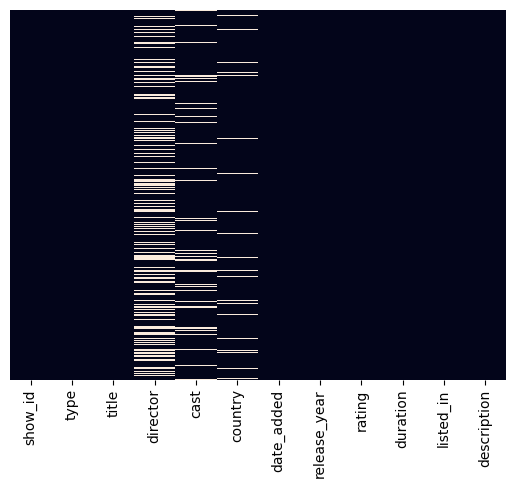

In [11]:
# Visualizing the missing values
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)
plt.show()

### What did you know about your dataset?

I have been given a dataset which consists of Tv shows and Movies available on netflix as of 2019.The dataset consists of **7787** rows and **12** features.The dataset **doesn't** contain any **duplicated** values but there are many features in dataset which **contains null** values like  **director** feature has maximum null vlaue around **30.68%**,followed by **cast 9.22%** ,**country 6.51%**,**date_added 0.13%** and **rating 0.09%**.

The dataset provides us information regarding type of content whether **Tv shows or Movies** that has been added on Netflix.It provides information like unique Show_id,Title,Director,cast of the Tv show/Movie and Country where Movie/Tv show was produced.When was it added on Netflix,what is the release date,duration,Category,rating and Description of Movie/Tv Show.

My task is to **explore** the data in order to find some useful insights.Try to understand what type of **content** is available in **different countries** and has to develop a **Clustering model** based on matching text-based Feature

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
# Dataset Describe
data.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

Here is the description of all Features:

**show_id**: Unique id for each Movie/show.

**type**: Type of Content whether a Movie/TV Show

**title**: Name of the Movie/TV show.

**director**: Name of the director of the Movie/TV show.

**cast**: Names of the actors and actresses involved in the Movie/TV show.

**country**: Country where Movie/Show was produced.

**date_added**: When was the Movie/Show added to Netflix.

**release_year**: Which year Movie/Show was released.

**rating**: TV rating of the show.

**duration**: Total duration in minutes or Number of seasons

**listed_in**: Categories or genres of the Movie/TV show.

**description**: A brief summary of Movie/Tv show

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
print(data.apply(lambda col:col.unique()))
print('-'*50)
print('Unique Value Count')
print('-'*50)
print(data.apply(lambda col:col.nunique()))

show_id         [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...
type                                             [TV Show, Movie]
title           [3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19...
director        [nan, Jorge Michel Grau, Gilbert Chan, Shane A...
cast            [João Miguel, Bianca Comparato, Michel Gomes, ...
country         [Brazil, Mexico, Singapore, United States, Tur...
date_added      [August 14, 2020, December 23, 2016, December ...
release_year    [2020, 2016, 2011, 2009, 2008, 2019, 1997, 201...
rating          [TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y...
duration        [4 Seasons, 93 min, 78 min, 80 min, 123 min, 1...
listed_in       [International TV Shows, TV Dramas, TV Sci-Fi ...
description     [In a future where the elite inhabit an island...
dtype: object
--------------------------------------------------
Unique Value Count
--------------------------------------------------
show_id         7787
type               2
title           7787
director  

## 3. ***Data Wrangling***

### Data Wrangling Code

# **Null Value Treatment**

In [15]:
#Get null columns
null_columns=data.columns[data.isnull().any()]
print('Columns contain null values are :',null_columns.to_list())
print('-'*50)
#Get Null value Count
print('Null value Count of each Column \n',data[null_columns].isnull().sum().sort_values(ascending=False))
print('-'*50)
#null value percentage
print('Null Value Percentage of each Column\n',round((data[null_columns].isnull().sum().sort_values(ascending=False))*100/len(data),2))

Columns contain null values are : ['director', 'cast', 'country', 'date_added', 'rating']
--------------------------------------------------
Null value Count of each Column 
 director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64
--------------------------------------------------
Null Value Percentage of each Column
 director      30.68
cast           9.22
country        6.51
date_added     0.13
rating         0.09
dtype: float64


In [16]:
#Value Counts of Each Null Column
for col in null_columns:
  print('-'*50)
  print('\033[1m' + col,'Column'+ '\033[0m')              # this \033[0m for bold letters
  print('-'*50)
  print(data[col].value_counts())

--------------------------------------------------
director Column
--------------------------------------------------
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                          ..
Vibhu Virender Puri        1
Lucien Jean-Baptiste       1
Jason Krawczyk             1
Quinn Lasher               1
Sam Dunn                   1
Name: director, Length: 4049, dtype: int64
--------------------------------------------------
cast Column
--------------------------------------------------
David Attenborough                                                                                                                                                            18
Samuel West                                                                                                                                                                   10
Jeff Dunham                                         

* Filling null values present in **director and cast** column with **unknown** as i don't have any knowledge or data about these features
* We can see from the value_counts that most of Movies/Shows are from **US** so,let's fill missing values in **Country** Column with **Mode**
* Column like **date_added,rating** contain **few** null value so, these values can be **droped**


In [17]:
#droping/filling null values
data[['director','cast']]=data[['director','cast']].fillna('unknown')
data['country']=data['country'].fillna(data['country'].mode()[0])
data.dropna(axis=0,inplace=True)

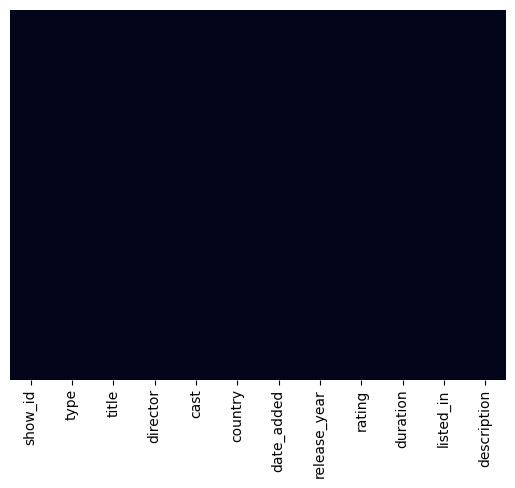

In [18]:
#visualizing the data again after dealing with the null values
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)
plt.show()

In [19]:
#head of data after removing null values
data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


from matplotlib import pyplot as plt
_df_0['release_year'].plot(kind='hist', bins=20, title='release_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('listed_in').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_added']
  ys = series['release_year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('date_added', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_added')
_ = plt.ylabel('release_year')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_added']
  ys = series['release_year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('date_added', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('country')):
  _plot_series(series, series_name, i)
  fig.legend(title='country', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_added')
_ = plt.ylabel('release_year')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_added']
  ys = series['release_year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('date_added', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('rating')):
  _plot_series(series, series_name, i)
  fig.legend(title='rating', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_added')
_ = plt.ylabel('release_year')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_added']
  ys = series['release_year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('date_added', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('listed_in')):
  _plot_series(series, series_name, i)
  fig.legend(title='listed_in', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_added')
_ = plt.ylabel('release_year')

from matplotlib import pyplot as plt
_df_9['release_year'].plot(kind='line', figsize=(8, 4), title='release_year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['country'].value_counts()
    for x_label, grp in _df_10.groupby('type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('type')
_ = plt.ylabel('country')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['rating'].value_counts()
    for x_label, grp in _df_11.groupby('country')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('country')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['listed_in'].value_counts()
    for x_label, grp in _df_12.groupby('rating')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('rating')
_ = plt.ylabel('listed_in')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='release_year', y='type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='release_year', y='country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['rating'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='release_year', y='rating', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['listed_in'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='release_year', y='listed_in', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [20]:
#creating new column from from date_added column
data['date_added']=pd.to_datetime(data['date_added'])
data['added_year']=data['date_added'].dt.year
data['added_month']=data['date_added'].dt.month
data['added_day']=data['date_added'].dt.day


In [22]:
#looking of the dataset after adding new columns
data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_day
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7,1
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,6,1
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,R,119 min,Dramas,After one of his high school students attacks ...,2019,11,1
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",2019,4,1
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,2017,12,15


In [23]:
#exploring rating feature
data['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

Explaining Rating Column:
* TV-MA :- Mature Audience Only (for adults and may be unsuitable for children under 17)
* R :- Restricted (for adults and may be unsuitable for children under 17)
* PG-13 :-Parents Strongly Cautioned (Some material may not be suited for children under age 13.)
* TV-14 :- for children ages 14 and older
* TV-PG :- Parental Guidance Suggested
* NR :- Not rated (can be considered for adults)
* TV-G :- General Audience (for all ages)
* TV-Y :- Content for children ages 2 to 6
* TV-Y7 :- Content for children ages 7 and older (older children)
* PG :- Parental Guidance Suggested
* G :-General Audience (for all ages)
* NC-17 :- Clearly Adult
* TV-Y7-FV :- Content for children ages 7 and older (older children)
* UR :- Unrated (can be considered for adults)

convert the result into bins:
  *  **Adult** (17+): TV-MA, R ,NC-17,NR,UR
  *  **Children**: TV-PG, TV-G,TV-Y,TV-Y7,TV-Y7-FV
  *  **Teenagers**: PG-13, TV-14
  *  **General Audience**: PG,G



In [24]:
#define age_group and map it with rating
age_groups = {'TV-MA': 'Adults',
              'R': 'Adults',
              'PG-13': 'Teenagers',
              'TV-14': 'Teenagers',
              'TV-PG': 'Children',
              'NR': 'Adults',
              'TV-G': 'Children',
              'TV-Y': 'Children',
              'TV-Y7': 'Children',
              'PG': 'General Audience',
              'G': 'General Audience',
              'NC-17': 'Adults',
              'TV-Y7-FV': 'Children',
              'UR': 'Adults'}
data['age_group'] = data['rating'].map(age_groups)

In [25]:
#exploring duration column
data['duration'].unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '113 min', '114 min', '130 min',
       '94 min', '140 min', '135 min', '82 min', '70 min', '121 min',
       '92 min', '164 min', '53 min', '83 min', '116 min', '86 min',
       '120 min', '96 min', '126 min', '129 min', '77 min', '137 min',
       '148 min', '28 min', '122 min', '176 min', '85 min', '22 min',
       '68 min', '111 min', '29 min', '142 min', '168 min', '21 min',
       '59 min', '20 min', '98 min', '108 min', '76 min', '26 min',
       '156 min', '30 min', '57 min', '150 min', '133 min', '115 min',
       '

In [26]:
#cleaning duration column by removing suffix season,min,seasons,s from duration
data['duration'] = data['duration'].str.replace('Season', '').str.replace('Seasons', '').str.replace('min', '').str.replace('s','')
data['duration']=data['duration'].astype(int)

As the duration column contains season,seasons,s,min at end so,it will be difficult it do EDA on it.

In [27]:
#head of the data after doing some data wraglings
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_day,age_group
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,Teenagers
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,1,1,Teenagers


from matplotlib import pyplot as plt
_df_17['release_year'].plot(kind='hist', bins=20, title='release_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['duration'].plot(kind='hist', bins=20, title='duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['added_year'].plot(kind='hist', bins=20, title='added_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['added_month'].plot(kind='hist', bins=20, title='added_month')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_21.groupby('show_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_22.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_23.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_24.groupby('director').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25.plot(kind='scatter', x='release_year', y='duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='duration', y='added_year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27.plot(kind='scatter', x='added_year', y='added_month', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='added_month', y='added_day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_added']
  ys = series['release_year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_29.sort_values('date_added', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('show_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='show_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_added')
_ = plt.ylabel('release_year')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_added']
  ys = series['release_year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_30.sort_values('date_added', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('type')):
  _plot_series(series, series_name, i)
  fig.legend(title='type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_added')
_ = plt.ylabel('release_year')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_added']
  ys = series['release_year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_31.sort_values('date_added', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('title')):
  _plot_series(series, series_name, i)
  fig.legend(title='title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_added')
_ = plt.ylabel('release_year')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date_added']
  ys = series['release_year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_32.sort_values('date_added', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('director')):
  _plot_series(series, series_name, i)
  fig.legend(title='director', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date_added')
_ = plt.ylabel('release_year')

from matplotlib import pyplot as plt
_df_33['release_year'].plot(kind='line', figsize=(8, 4), title='release_year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['duration'].plot(kind='line', figsize=(8, 4), title='duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35['added_year'].plot(kind='line', figsize=(8, 4), title='added_year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_36['added_month'].plot(kind='line', figsize=(8, 4), title='added_month')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['type'].value_counts()
    for x_label, grp in _df_37.groupby('show_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('show_id')
_ = plt.ylabel('type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['title'].value_counts()
    for x_label, grp in _df_38.groupby('type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('type')
_ = plt.ylabel('title')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['director'].value_counts()
    for x_label, grp in _df_39.groupby('title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('title')
_ = plt.ylabel('director')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['cast'].value_counts()
    for x_label, grp in _df_40.groupby('director')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('director')
_ = plt.ylabel('cast')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_41['show_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_41, x='release_year', y='show_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_42['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_42, x='release_year', y='type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_43['title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_43, x='release_year', y='title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_44['director'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_44, x='release_year', y='director', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [28]:
#Create movies and show dataframe
movies=data[data['type']=='Movie']
shows=data[data['type']=='TV Show']

### What all manipulations have you done and insights you found?

Firstly, I addressed the issue of null values in my dataframe. I filled the null values in the 'director' and 'cast' columns with 'unknown', as there was a substantial number of missing values, and no additional data was available for these features. Then, I replaced the null values in the 'Country' column with the mode value. Additionally, I dropped the null values in columns such as 'date_added' and 'rating'.

Subsequently, I created new columns, namely 'added_year', 'added_month', and 'added_day', derived from the 'date_added' column. Following this, I examined the 'rating' column and grouped the various types of ratings into distinct age groups such as Adults, Children, Teenagers, and General Audience.

Next, I investigated and cleaned the 'duration' column by eliminating all suffixes such as 'season', 'min', and 'seasons'.

Finally, I segregated the data into TV shows and movies.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Distribution of Content Type

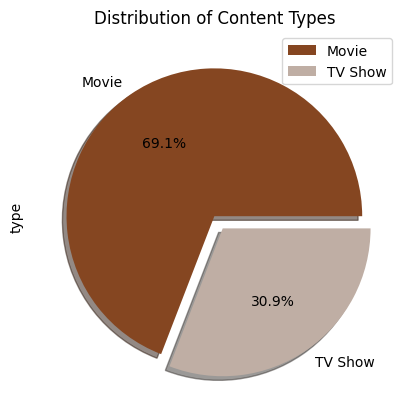

In [32]:
# Chart - 1 visualization code
#univerate analysis
#plotting pie chart
colors = ['#854621', '#bfaea4', '#6c9bd2', '#a6c1de', '#c9daf8']

data['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=[0, 0.1], colors=colors)
plt.title('Distribution of Content Types')
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

I have plotted **pie** chart to find out the distribution of **Tv Show** and **Movie** in the dataset

##### 2. What is/are the insight(s) found from the chart?

From the plot it can be seen that **Movie** content is more i,e **69.1** and **Tv show** content is less i,e **30.9**  in the dataset

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There are less Tv show content so it is recomended to increase the TV show content

#### Chart - 2 Content Distribution among Age Groups

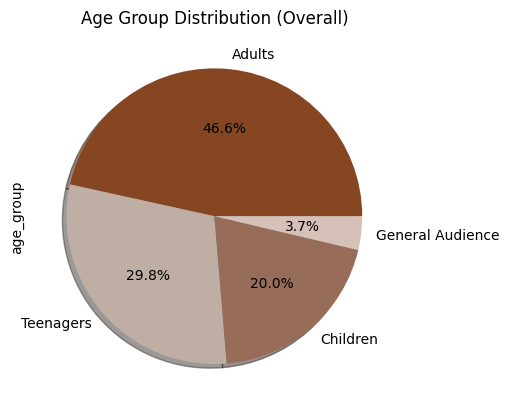

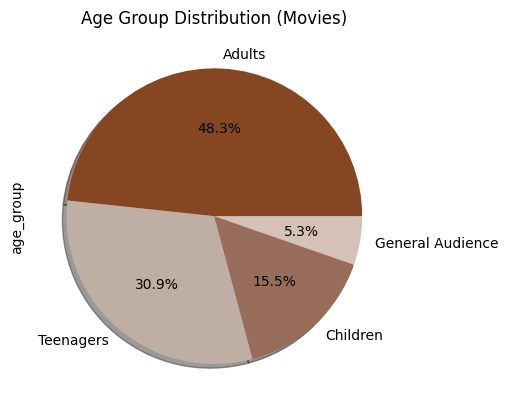

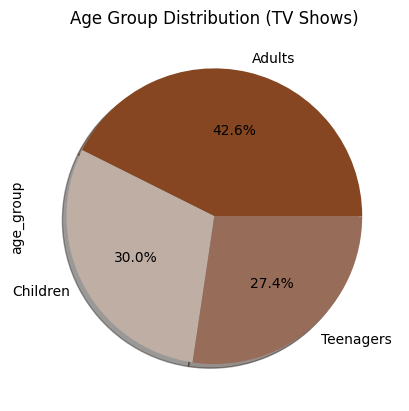

In [33]:
# Chart - 2 visualization code
#univeriate analysis

# Plot pie chart for the entire dataset
import matplotlib.pyplot as plt

# Define colors
colors = ['#854621', '#bfaea4', '#976c59', '#d6c1b9', '#6d4c3d']

# Plot pie chart for overall age group distribution
data['age_group'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors)
plt.title('Age Group Distribution (Overall)')
plt.show()

# Plot pie chart for movies
movies['age_group'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors)
plt.title('Age Group Distribution (Movies)')
plt.show()

# Plot pie chart for TV shows
shows['age_group'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors)
plt.title('Age Group Distribution (TV Shows)')
plt.show()



##### 1. Why did you pick the specific chart?

I have plotted pie chart to find out the distribution among different age group

##### 2. What is/are the insight(s) found from the chart?

it can be analysed from the pie chart that most of the content in the Netflix is suitable for **Adults** and **Teenagers** and also in TV Show there is no content for **General Audience**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For gaining high revenue production company should focus more on Adult and Teenagers content

#### Chart - 3 Duration Distribution

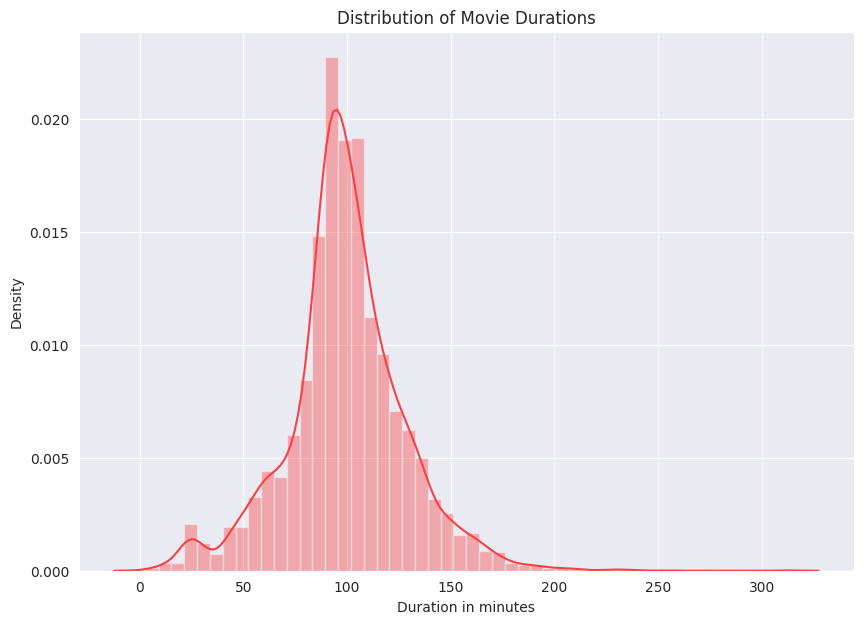

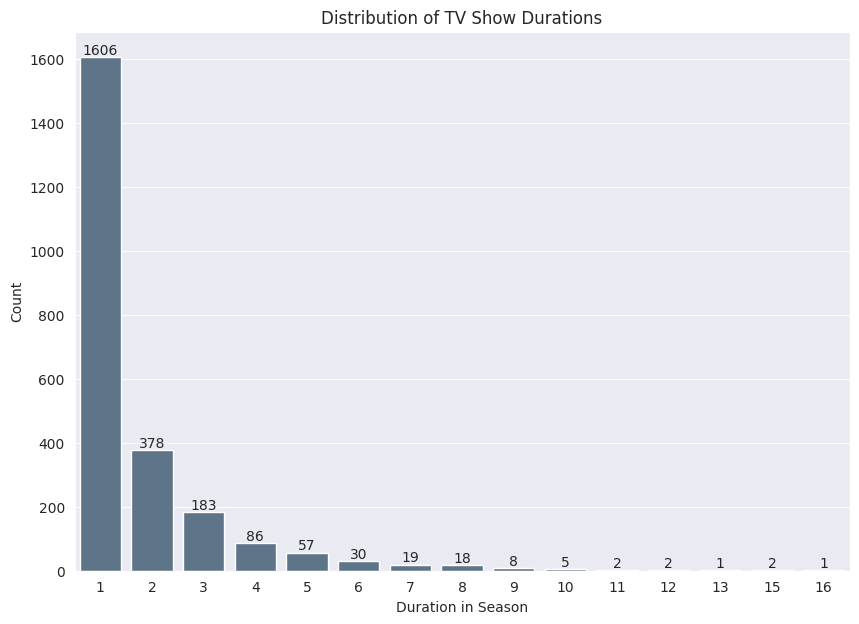

In [34]:
# Chart - 3 visualization code
#univeriate Analysis

#Plotting distplot for Movie duration
import seaborn as sns
import matplotlib.pyplot as plt

# Set aesthetic style
sns.set_style('darkgrid')

# Define beautiful aesthetic colors
movie_color = '#F94144'
show_color = '#577590'

# Plot distribution of movie durations
plt.figure(figsize=(10,7))
sns.distplot(movies['duration'], color=movie_color)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration in minutes')
plt.show()

# Plot count plot for show durations
plt.figure(figsize=(10,7))
ax = sns.countplot(data=shows, x='duration', palette=[show_color])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.xlabel('Duration in Season')
plt.ylabel('Count')
plt.title('Distribution of TV Show Durations')
plt.show()


##### 1. Why did you pick the specific chart?

I have plotted distplot and count plot to find out the duration distribution in movies and TV shows

##### 2. What is/are the insight(s) found from the chart?

It can be seen that most of the movies has duration of around **90 to 120 minutes** and most of the TV shows has only **1 Season**.

#### Chart - 4 Content Added to Netflix OverTime

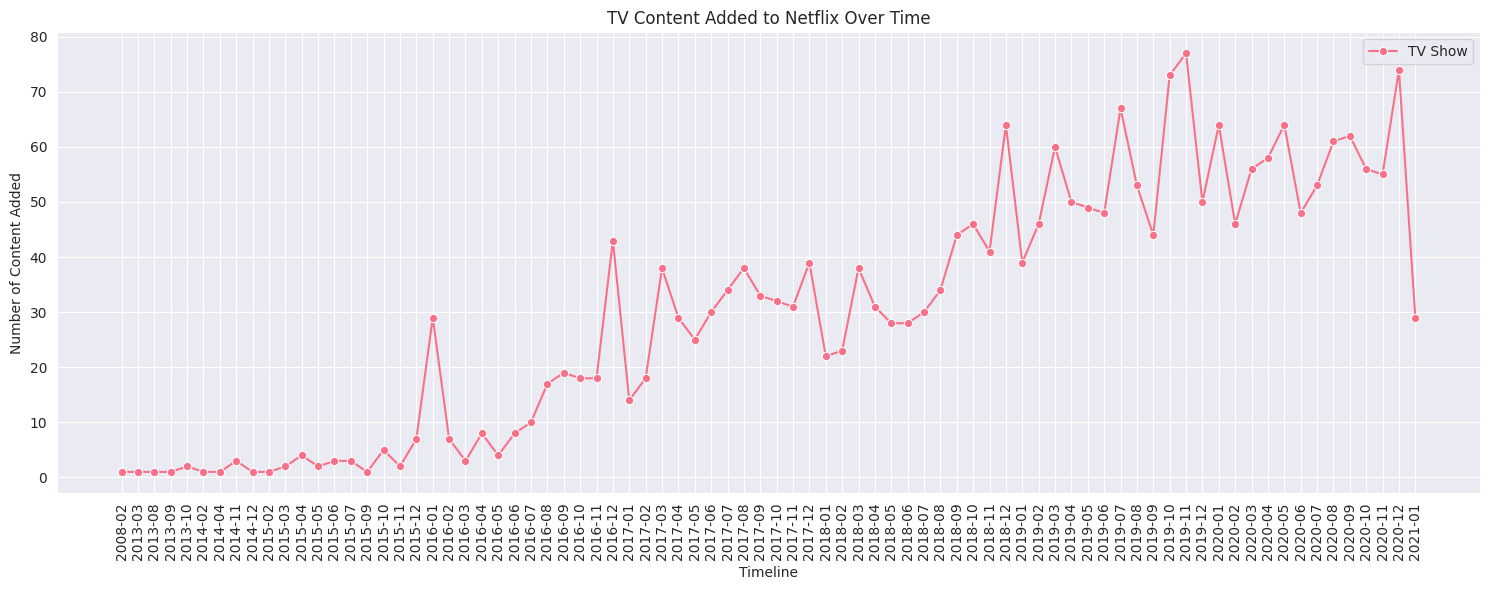

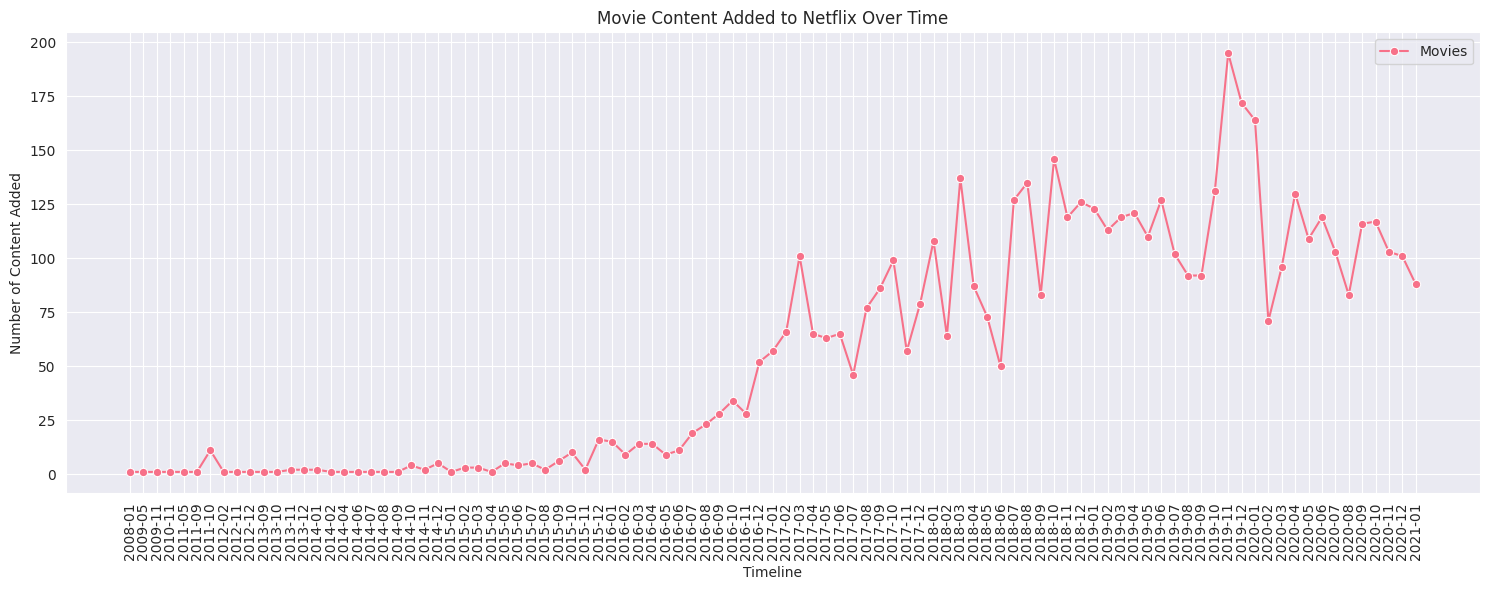

In [36]:
# Chart - 4 visualization code
import seaborn as sns

# Grouping data
movie_content = movies.groupby(['added_year', 'added_month']).size().reset_index(name='count')
show_content = shows.groupby(['added_year', 'added_month']).size().reset_index(name='count')

# Plotting line chart for TV shows
plt.figure(figsize=(15, 6))
sns.set_palette("husl")  # Using a beautiful aesthetic color palette
sns.lineplot(data=show_content, x=show_content.index, y='count', marker='o', label='TV Show')
plt.xlabel('Timeline')
plt.ylabel('Number of Content Added')
plt.title('TV Content Added to Netflix Over Time')
plt.xticks(show_content.index, show_content.apply(lambda x: f'{x["added_year"]}-{x["added_month"]:02}', axis=1), rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting line chart for movies
plt.figure(figsize=(15, 6))
sns.set_palette("husl")  # Using the same beautiful aesthetic color palette
sns.lineplot(data=movie_content, x=movie_content.index, y='count', marker='o', label='Movies')
plt.xlabel('Timeline')
plt.ylabel('Number of Content Added')
plt.title('Movie Content Added to Netflix Over Time')
plt.xticks(movie_content.index, movie_content.apply(lambda x: f'{x["added_year"]}-{x["added_month"]:02}', axis=1), rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I have plotted a line plot to find find out the content added on netflix overtime

##### 2. What is/are the insight(s) found from the chart?

* It can be seen that after **2015** large number of Tv Shows were added on the platform.In **Nov 2019** maximum Tv show content was added to the platform.
* Similarly after **2015** large number of Movie content was added to the platform and in  **Nov 2019** maximum content was added.

#### Chart - 5 Content Added to Netflix by Day of Month

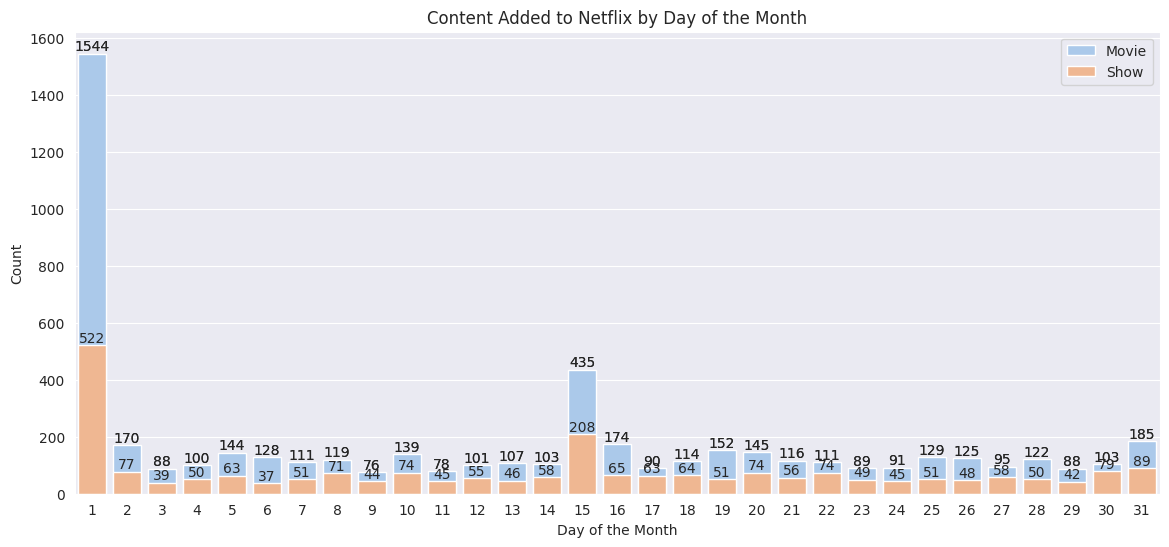

In [37]:
# Chart - 5 visualization code
#plotting count plot

# Define beautiful aesthetic colors
colors = sns.color_palette('pastel')

plt.figure(figsize=(14, 6))
ax = sns.countplot(data=movies, x='added_day', color=colors[0], label='Movie')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

ax = sns.countplot(data=shows, x='added_day', color=colors[1], label='Show')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.legend()
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('Content Added to Netflix by Day of the Month')

plt.show()



##### 1. Why did you pick the specific chart?

I have plotted count plot to find distribution of content added by Day of Month

##### 2. What is/are the insight(s) found from the chart?

It can be find out that on **1st** and **15th** of every month maximum content both TV shows and Movies has been added to the platform

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

New content should be added to platform at regular interval

#### Chart - 6 Content Release Count by Year

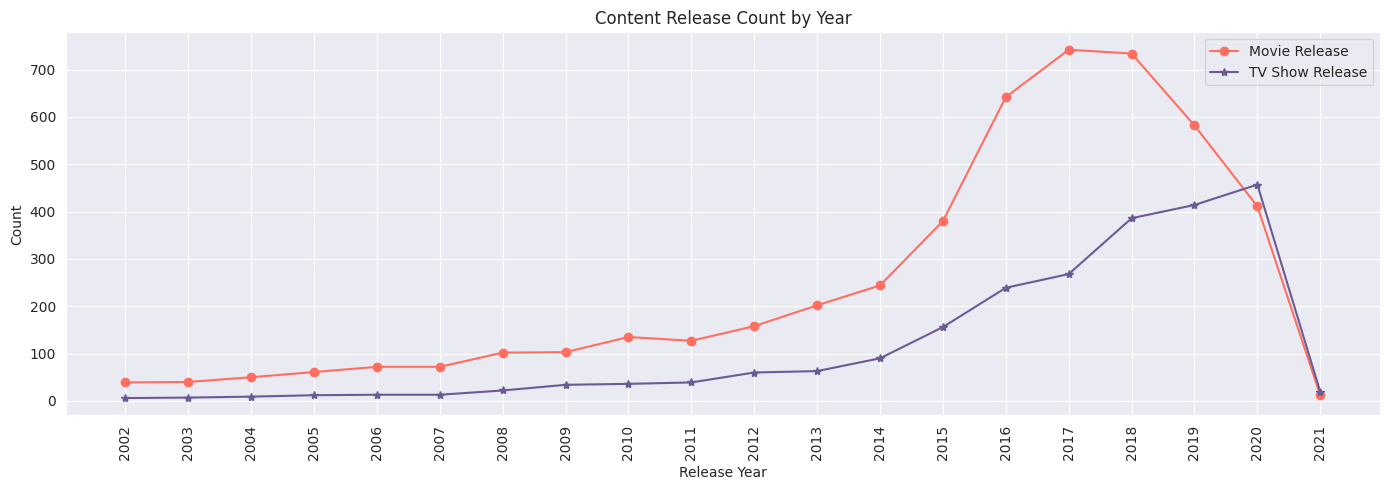

In [38]:
# Chart - 6 visualization code
#line plot to get content release count by year(last 20 years)


# Define aesthetic colors
movie_color = '#FF6F61'  # Coral
tv_show_color = '#6B5B95'  # Amethyst

plt.figure(figsize=(14, 5))

# Grouping data
release_count = data.groupby('release_year').size().reset_index(name='count')
movies_count = movies.groupby('release_year').size().reset_index(name='count')
shows_count = shows.groupby('release_year').size().reset_index(name='count')

# Considering the last 20 years
last_20_years = release_count['release_year'].tail(20)
movies_last_20_years = movies_count[movies_count['release_year'].isin(last_20_years)]
shows_last_20_years = shows_count[shows_count['release_year'].isin(last_20_years)]

# Plotting chart
plt.plot(movies_last_20_years['release_year'], movies_last_20_years['count'], color=movie_color, marker='o', label='Movie Release')
plt.plot(shows_last_20_years['release_year'], shows_last_20_years['count'], color=tv_show_color, marker='*', label='TV Show Release')

plt.xticks(last_20_years, rotation='vertical')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Content Release Count by Year')
plt.tight_layout()
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

I have used line plot to find the distribution of release of Movies and TV shows of last 20 years

##### 2. What is/are the insight(s) found from the chart?


It can be seen that both TV Show and Movie content release has been increased over years and after **2008** more number of movies and TV shows were released and it can be also seen that after **2018** and **2020** there were large drop in release of Movies and TV shows respectively

#### Chart - 7 Top Genres

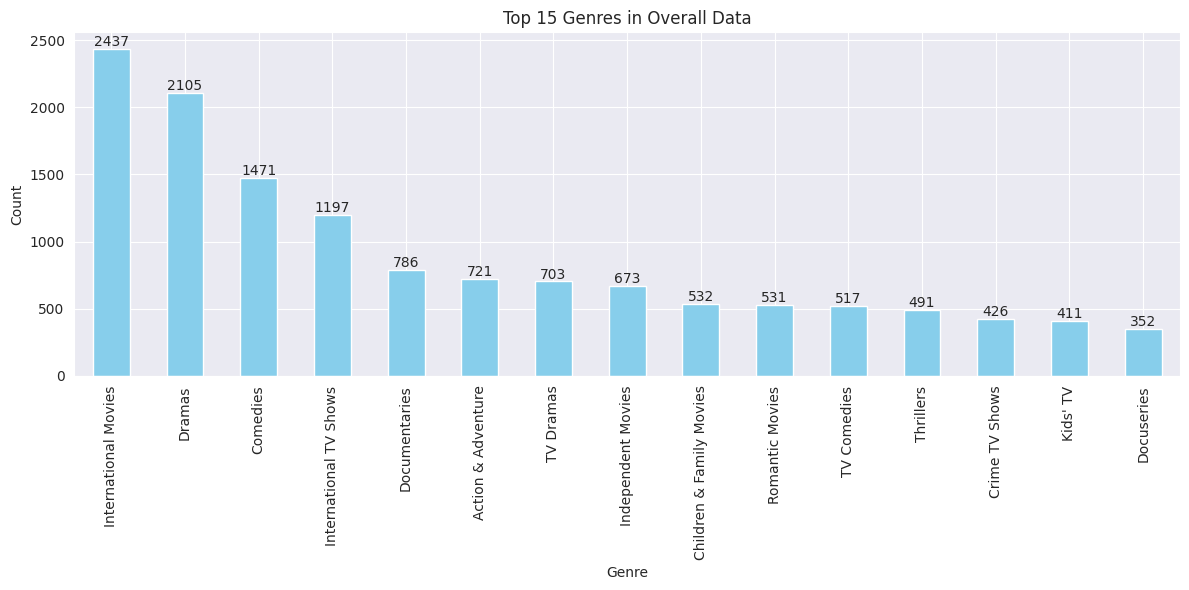

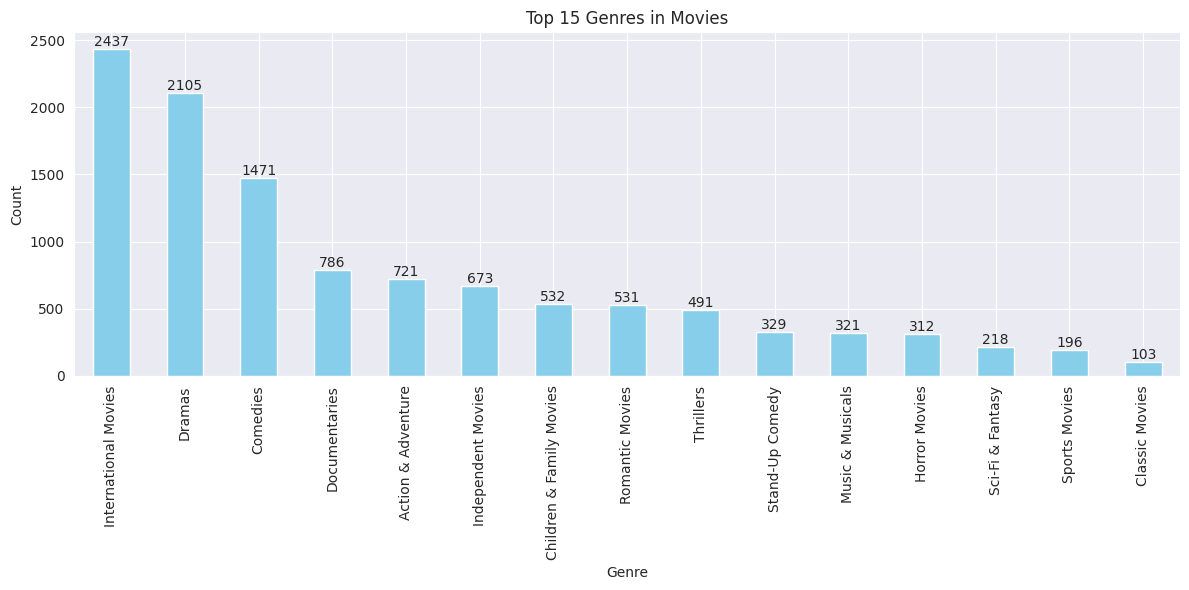

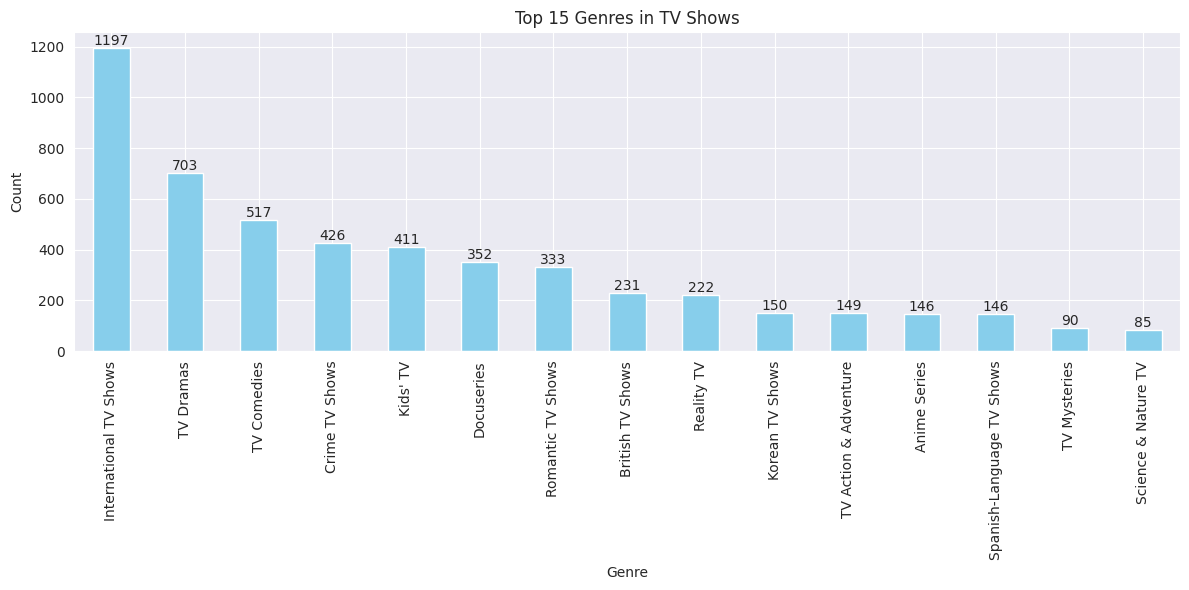

In [43]:
# Chart - 7 visualization code
#calculating last top genres of movie and show



# Replace color palette with 'sky blue'
colors = 'skyblue'

# Calculate top genres for overall data
top_genres = data['listed_in'].str.split(',', expand=True).stack().str.strip().value_counts().head(15)

# Calculate top genres for movies
top_movie_genres = movies['listed_in'].str.split(',', expand=True).stack().str.strip().value_counts().head(15)

# Calculate top genres for TV shows
top_show_genres = shows['listed_in'].str.split(',', expand=True).stack().str.strip().value_counts().head(15)

# Plot the top genres for overall data
plt.figure(figsize=(12, 6))
ax = top_genres.plot(kind='bar', color=colors)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 15 Genres in Overall Data')
plt.xticks(rotation='vertical')
plt.tight_layout()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

# Plot the top genres for movies
plt.figure(figsize=(12, 6))
ax = top_movie_genres.plot(kind='bar', color=colors)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 15 Genres in Movies')
plt.xticks(rotation='vertical')
plt.tight_layout()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

# Plot the top genres for TV shows
plt.figure(figsize=(12, 6))
ax = top_show_genres.plot(kind='bar', color=colors)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 15 Genres in TV Shows')
plt.xticks(rotation='vertical')
plt.tight_layout()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()




##### 1. Why did you pick the specific chart?

I have plotted barplot to find out the Top 15 genres

##### 2. What is/are the insight(s) found from the chart?

It can be seen that **Internation Movies and TV shows** are most popular genres in Tv show and in Movies followed by **Dramas** and **Comedy**

#### Chart - 8 Top 15 Countries

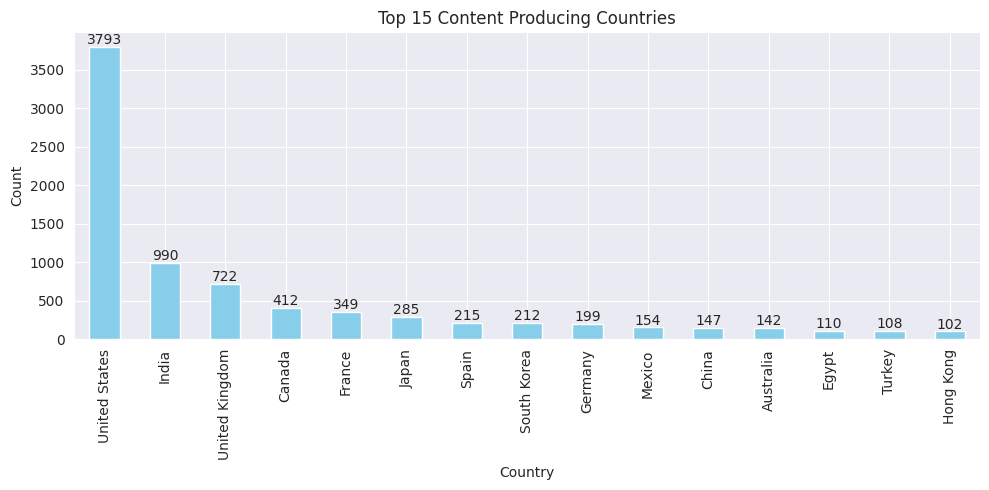

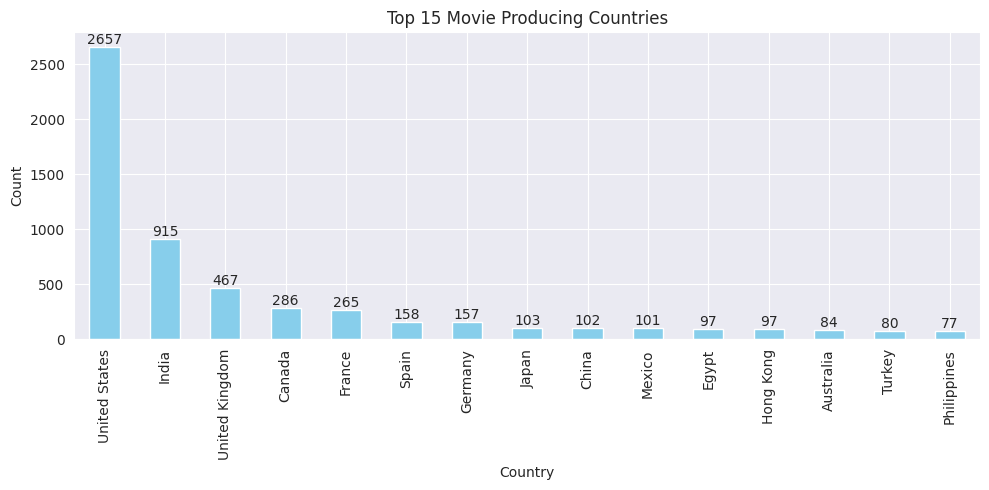

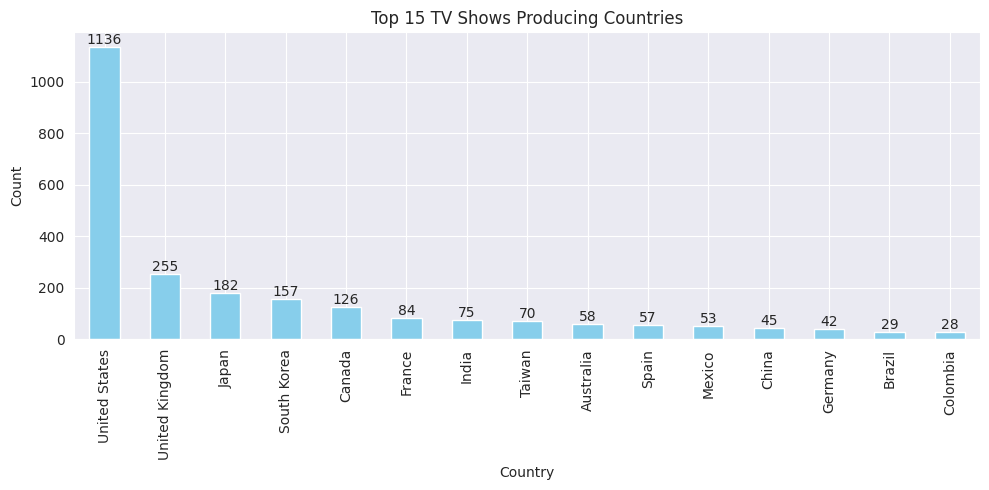

In [44]:
# Chart - 8 visualization code
#calculating top 15 content produced countries
top_country = data['country'].str.split(',', expand=True).stack().str.strip().value_counts().head(15)
movie_country = movies['country'].str.split(',', expand=True).stack().str.strip().value_counts().head(15)
show_country = shows['country'].str.split(',', expand=True).stack().str.strip().value_counts().head(15)

# Plot the top 15 Producing Countries for overall data
plt.figure(figsize=(10, 5))
ax = top_country.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 15 Content Producing Countries')
plt.xticks(rotation='vertical')
plt.tight_layout()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

# Plot the top 15 Movie Producing Countries
plt.figure(figsize=(10, 5))
ax = movie_country.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 15 Movie Producing Countries')
plt.xticks(rotation='vertical')
plt.tight_layout()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

# Plot the top 15 TV Shows Producing Countries
plt.figure(figsize=(10, 5))
ax = show_country.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 15 TV Shows Producing Countries')
plt.xticks(rotation='vertical')
plt.tight_layout()
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()



##### 1. Why did you pick the specific chart?

I have plotted bar plot to find out what are the top content producing Countries

##### 2. What is/are the insight(s) found from the chart?

From the graph it can be analysed that:
* **USA** is the top content Producing Country followed by **India** and **United Kingdom** in overall and also in **Movies** related Content
* **USA** also produces more **TV series** followed by **United Kingdom**,**japan**
* **Japan**,**South Korea** produces more **TV Shows** than **Movies**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Countries can focus also on producing more and more TV shows along with Movies

#### Chart - 9 Top Show/Movie Director

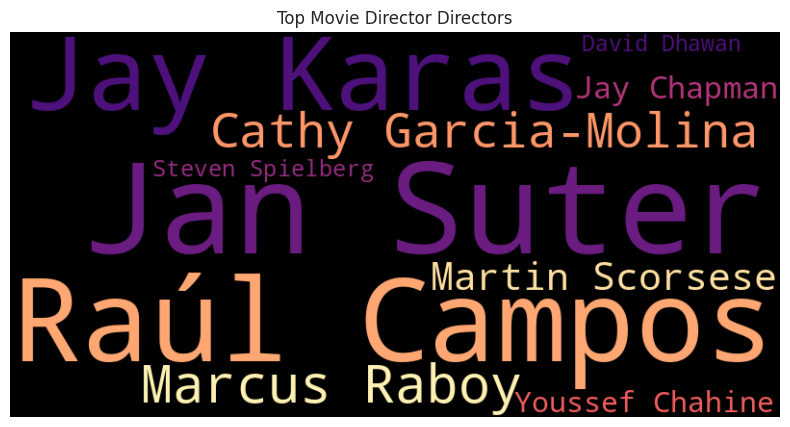

In [46]:
# Chart - 9 visualization code
# Generate the word cloud for Top Movie director
movie_director = movies[movies['director'] != 'unknown'].reset_index()
top_movie_director = movie_director['director'].str.split(',', expand=True).stack().str.strip().value_counts().head(10)

from wordcloud import WordCloud
wordcloud = WordCloud(background_color='black', colormap='magma', width=800, height=400)
wordcloud.generate_from_frequencies(top_movie_director)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Movie Director Directors')
plt.show()




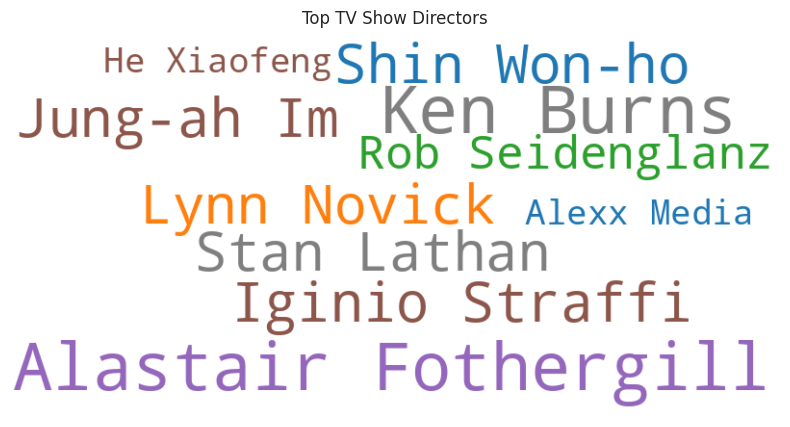

In [47]:
# Generate the word cloud  for Top Show director
show_director = shows[shows['director'] != 'unknown'].reset_index()
top_show_director = show_director['director'].str.split(',', expand=True).stack().str.strip().value_counts().head(10)

wordcloud = WordCloud(background_color='white', colormap='tab10', width=800, height=400)
wordcloud.generate_from_frequencies(top_show_director)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top TV Show Directors')
plt.show()


##### 1. Why did you pick the specific chart?

I have plotted word cloud to visualize top Tv show/Movie Director

##### 2. What is/are the insight(s) found from the chart?

From the Wordcloud graph it can be seen that
* **Jan Suter** followed by **Raul Campos,Jay Karas** has directed maximum Movies
* **Alastair Fothergill** and **Ken Burns** has directed maximum TV Shows

#### Chart - 10 Most Popular Cast

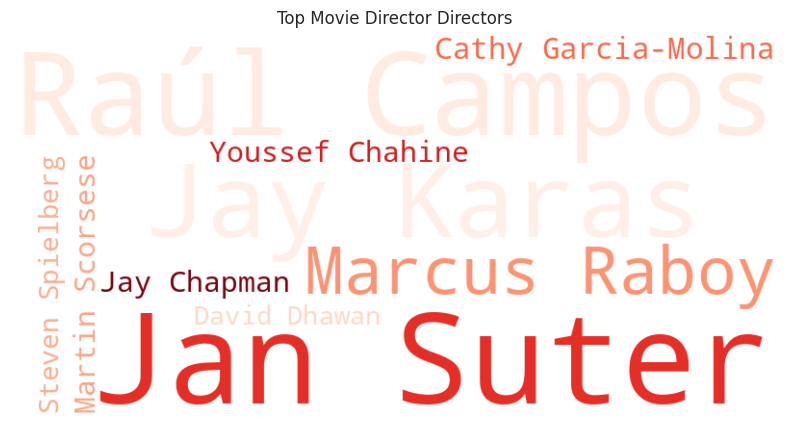

In [48]:
# Chart - 10 visualization code
movie_director = movies[movies['director'] != 'unknown'].reset_index()
top_movie_director = movie_director['director'].str.split(',', expand=True).stack().str.strip().value_counts().head(10)

from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', colormap='Reds', width=800, height=400)
wordcloud.generate_from_frequencies(top_movie_director)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Movie Director Directors')
plt.show()


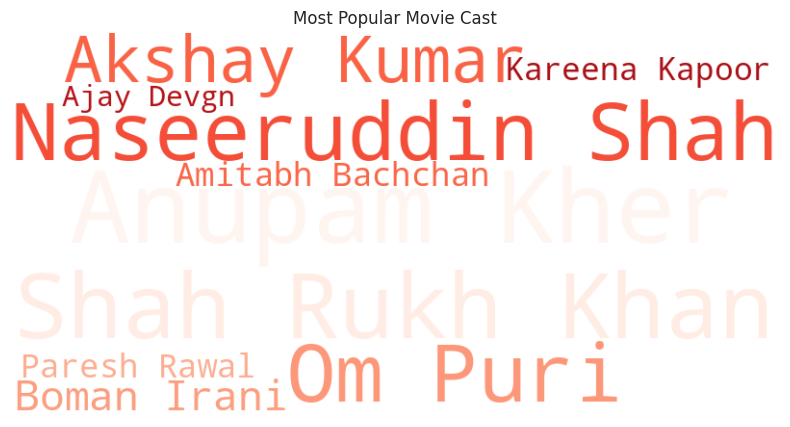

In [49]:
movie_cast = movies[movies['cast'] != 'unknown']['cast'].str.split(',', expand=True).stack().str.strip().value_counts().head(10)

from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', colormap='Reds', width=800, height=400)
wordcloud.generate_from_frequencies(movie_cast)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Popular Movie Cast')
plt.show()


##### 1. Why did you pick the specific chart?

I have plotted Word Cloud to find Most Popular cast

##### 2. What is/are the insight(s) found from the chart?

It can be seen that:   
* **Anupam Kher**,**Shah Rukh Khan**,**Naseeruddin Shah** etc are famous Movie Cast
*  **Takahiro Sakurai, Yuki Kaji,Daisuke Ono** etc are famous TV Show cast

#### Chart - 11 Distribution of Content Produced by Top Countries for different Age Group

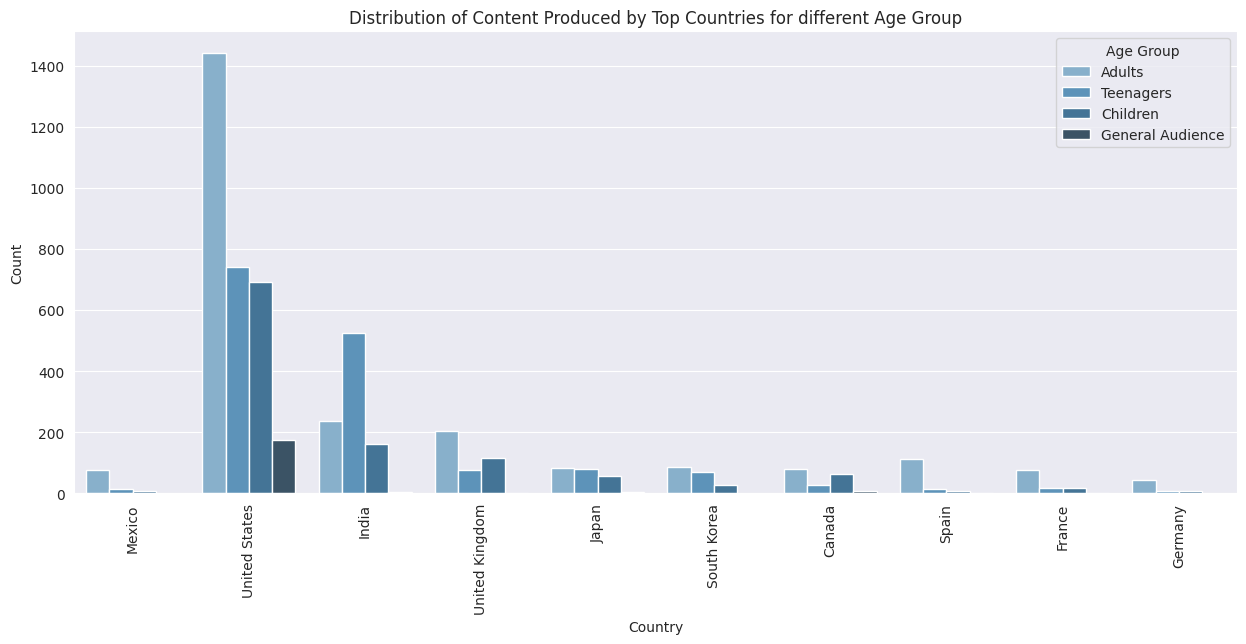

In [51]:
# Chart - 11 visualization code
# Select the top N countries based on content creation
top_countries = data['country'].str.split(',', expand=True).stack().str.strip().value_counts().head(10).index

# Filter the data for the top countries
filtered_data = data[data['country'].isin(top_countries)]

# Create a countplot to visualize the distribution of age groups in each top country
plt.figure(figsize=(15, 6))
sns.countplot(data=filtered_data, x='country', hue='age_group', palette='Blues_d')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.title('Distribution of Content Produced by Top Countries for different Age Group')
plt.xticks(rotation='vertical')
plt.show()



##### 1. Why did you pick the specific chart?

using countplot to find find out the distribution of content produced by top countries for different age groups

##### 2. What is/are the insight(s) found from the chart?

It was found that:
* Almost **all top countries** produced more **adult** related content except **india** produce more **Teenagers** content

#### Chart - 12 Frequently Word Used in Description

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


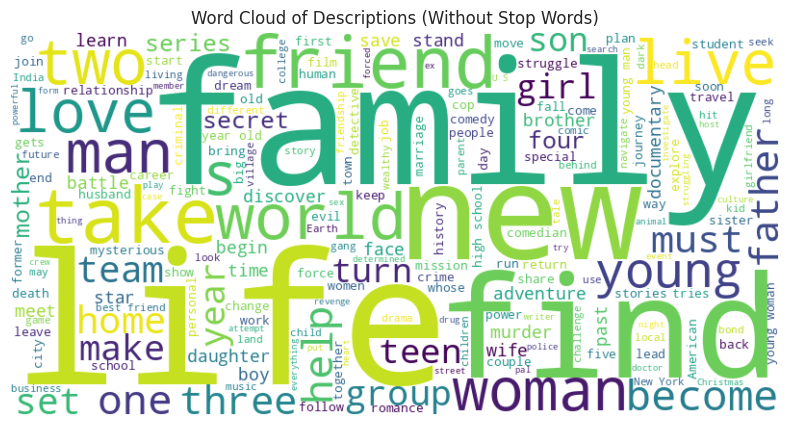

In [52]:
# Chart - 12 visualization code
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Download the stopwords corpus
nltk.download('stopwords')

# Define the list of stop words
stop_words = set(stopwords.words('english'))

# Combine the descriptions into a single string
combined_description = ' '.join(data['description'])

# Remove stop words from the combined description
filtered_description = ' '.join(word for word in combined_description.split() if word.lower() not in stop_words)

# Generate the word cloud from the filtered description
wordcloud = WordCloud(background_color='white', colormap='viridis', width=800, height=400)
wordcloud.generate(filtered_description)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Descriptions (Without Stop Words)')
plt.show()


##### 1. Why did you pick the specific chart?

Using World Cloud to find out what are the most frequent word used in descripition

##### 2. What is/are the insight(s) found from the chart?

It can be seen that word like **family,friend,life,find,two take,worldwoman,woman,live,love** etc are most frequent words used in the description

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Null Hypothesis Ho**:-There are more Tv Shows than Movies in our data set

**Alternative Hypothesis Ha**:-There are more Movies in our dataset

**Null Hypothesis Ho**:-United States Produces less content

**Alternative Hypothesis Ha**:-United States Produces more content

**Null Hypothesis Ho**:- There is less adult rated content

**Alternative Hypothesis Ha**:-Maximum Content is adult rated

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis Ho**:-There are more Tv Shows than Movies in our data set

**Alternative Hypothesis Ha**:-There are more Movies in our dataset

#### 2. Perform an appropriate statistical test.

In [53]:
#importing necessary libraries
import statsmodels.api as sm

## Count the number content
tv_show_count=movies.shape[0]
movie_count=shows.shape[0]
total_count=data.shape[0]
# Define the observed proportions
observed_proportions = np.array([tv_show_count / total_count, movie_count / total_count])

# Specify the null proportion
null_proportion = 0.5  # Assuming an equal proportion of TV shows and movies

# Perform the one-sample proportion test
zstat, pval = sm.stats.proportions_ztest([tv_show_count, movie_count], [total_count, total_count], null_proportion)

# Print the results
print(pval)
if pval < 0.05:
    print("Reject the null hypothesis. There are more movie-related content in the dataset.")
else:
    print("Fail to reject the null hypothesis. There are more TV show related content in the dataset.")

2.2269261458253183e-48
Reject the null hypothesis. There are more movie-related content in the dataset.


##### Which statistical test have you done to obtain P-Value?

 I have used **one-sample proportion ztest** to obtain the p-value

##### Why did you choose the specific statistical test?


To conduct statistical testing, the one-sample proportion test is employed to compare the observed proportion of a particular category (such as TV shows or movies) within a sample against a known or assumed population proportion (in this instance, the null proportion of 0.5, assuming an equal distribution of TV shows and movies).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis Ho**:-United States Produces less content among all countries

**Alternative Hypothesis Ha**:-United States Produces more maximum content

#### 2. Perform an appropriate statistical test.

In [ ]:
# Defining variables
united_states_count =  data[data['country']=='United States'].shape[0]
total_content_count =  data.shape[0]

# Specify the null proportion
null_proportion = 0.5  # Assuming an equal proportion of content production

# Perform the one-sample proportion test
zstat, pval = sm.stats.proportions_ztest(united_states_count, total_content_count, null_proportion)

# Print the results
print(pval)
if pval < 0.05:
    print("Reject the null hypothesis. The United States produces more content compared to other countries.")
else:
    print("Fail to reject the null hypothesis. The United States produces less content compared to other countries.")

1.2669001101521724e-83
Reject the null hypothesis. The United States produces more content compared to other countries.


##### Which statistical test have you done to obtain P-Value?

 I have used **one-sample proportion ztest** to obtain the p-value

##### Why did you choose the specific statistical test?

In order to examine this hypothesis, it's necessary to contrast the actual ratio of content generated by the United States with a predetermined or assumed ratio (referred to as the null ratio) that reflects an even distribution of content creation.

The one-sample proportion test is suitable for this situation since it enables us to determine if the observed ratio (content generated by the United States) significantly deviates from the null ratio (assuming an equitable distribution of content creation across all nations).

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis Ho**:- There is less adult rated content

**Alternative Hypothesis Ha**:-Maximum Content is adult rated

#### 2. Perform an appropriate statistical test.

In [54]:
# Perform Statistical Test to obtain P-Value
# Count the number of adult-rated content
adult_count = data[data['age_group'] == 'Adults'].shape[0]

# Specify the null proportion
null_proportion = 0.5  # Assuming an equal proportion of adult-rated content

# Perform the one-sample proportion test
zstat, pval = sm.stats.proportions_ztest(adult_count, data.shape[0], null_proportion)

# Print the results
print(pval)
if pval < 0.05:
    print("Reject the null hypothesis. The dataset contains a higher proportion of adult-rated content.")
else:
    print("Fail to reject the null hypothesis. The dataset does not contain a higher proportion of adult-rated content.")

1.0928035447502371e-09
Reject the null hypothesis. The dataset contains a higher proportion of adult-rated content.


##### Which statistical test have you done to obtain P-Value?

 I have used **one-sample proportion** ztest to obtain the p-value

##### Why did you choose the specific statistical test?

The hypothesis examines the proportion of adult-rated content in the dataset in comparison to a predetermined null proportion. Conversely, the alternative hypothesis posits that the maximum proportion of content is adult-rated.

The one-sample proportion test is fitting for this context as it permits the examination of whether the observed proportion of adult-rated content significantly deviates from the null proportion. This test facilitates the evaluation of whether there exists sufficient evidence to uphold the assertion that the dataset harbors a greater proportion of adult-rated content.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [55]:
#let's first create a copy of dataset
df=data.copy()

In [56]:
#let's drop some unwanted features from dataset
df.drop(columns=['show_id','date_added'],axis=1,inplace=True)

In [57]:
# Handling Missing Values & Missing Value Imputation
df.isnull().any()

type            False
title           False
director        False
cast            False
country         False
release_year    False
rating          False
duration        False
listed_in       False
description     False
added_year      False
added_month     False
added_day       False
age_group       False
dtype: bool

I already dealed with the null values during EDA Process


### 2. Handling Outliers

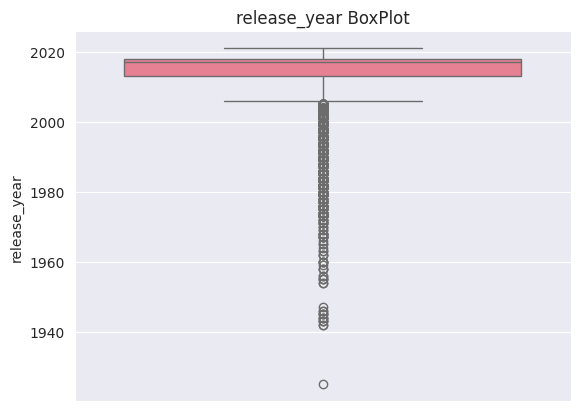

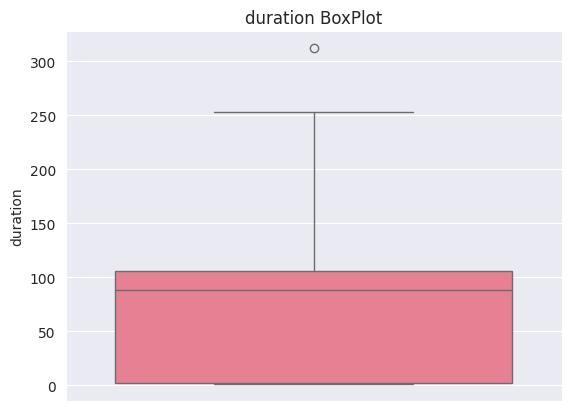

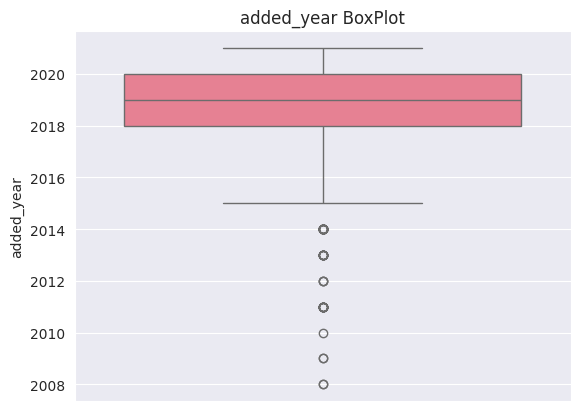

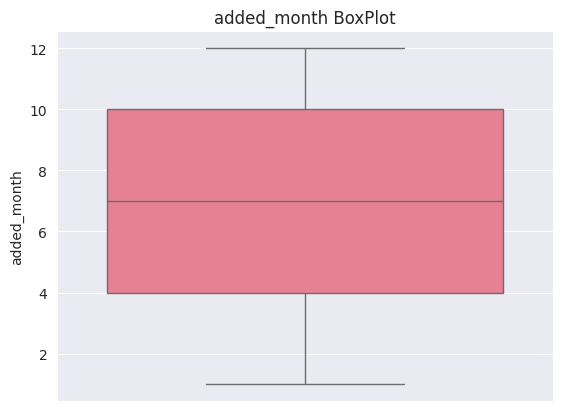

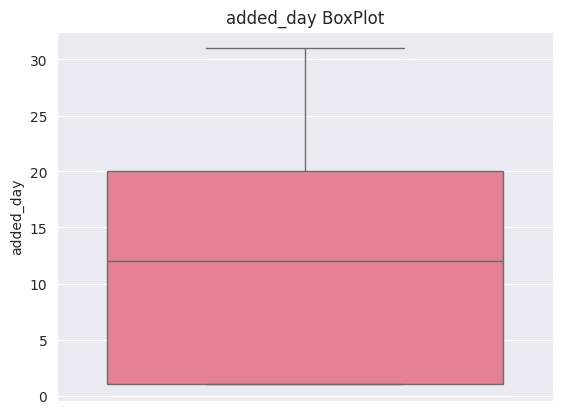

In [58]:
#Checking outliers
continous_col=['release_year','duration','added_year','added_month','added_day']
for col in continous_col:
  sns.boxplot(data[col])
  plt.title(f'{col} BoxPlot')
  plt.show()

Here we can see that there are some outliers present but every data is important so i will not remove them from my data

### 4. Textual Data Preprocessing


In [59]:
# creating new feature filtered using different features
df['filtered']=df['cast']+' '+df['director']+' '+df['type']+' '+df['country']+' '+df['description']+' '+df['listed_in']+' '+df['rating']
df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_year,added_month,added_day,age_group,filtered
0,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,Adults,"João Miguel, Bianca Comparato, Michel Gomes, R..."
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,Adults,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,Adults,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,Teenagers,"Elijah Wood, John C. Reilly, Jennifer Connelly..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,1,1,Teenagers,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar..."


Here i have created a new feature called **filtered** using columns like **cast,director,type,country,description,listed_in,rating**.I will perform all preprocessing on this column and will perform clustering based on this feature

#### 2. Lower Casing

In [60]:
# Lower Casing
df['filtered']=df['filtered'].str.lower()
#After lower casing the filtered column
df['filtered'][0]

'joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi unknown tv show brazil in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. international tv shows, tv dramas, tv sci-fi & fantasy tv-ma'

Here we have lower cased the filtered column

#### 3. Removing Punctuations

In [61]:
# Remove Punctuations
import string
print('I am going to remove these Punctuations from the Column (if present)',string.punctuation)

I am going to remove these Punctuations from the Column (if present) !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [62]:
#storing punctuations in exclude variable
exclude=string.punctuation
#defining function that will remove punctuation
def remove_punc(text):
  return text.translate(str.maketrans('','',exclude))
#applying on filtered column
df['filtered']=df['filtered'].apply(remove_punc)

In [63]:
#after removing punctuation
df['filtered'][0]

'joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi unknown tv show brazil in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor international tv shows tv dramas tv scifi  fantasy tvma'

Removing of punctuations is important because on tokenization each punctuation are going to considered as a separate word which increase dimensionality or they can be combined with any  word cause to change the meaning of that particular word

#### 4. Removing URLs & Removing words and digits contain digits.

In [64]:
# Remove URLs & Remove words and digits contain digits
import re
import string
# defining function to remove URLs/number from the 'filtered' column
def remove_url(text):
  pattern=re.compile(r'https?://\S+|www\.\S+')
  text= re.sub(pattern,'', text)
  # Replacing the number digit with space
  text = re.sub('[^a-zA-Z]', ' ', text)
  # return the text that doesn't contain any URL's or Numbers
  return text
#Applying function on Column
df['filtered']=df['filtered'].apply(remove_url)

#### 5. Removing Stopwords & Removing White spaces

In [65]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords

# Downloading stop words
nltk.download('stopwords')

# Getting the set of English stopwords
stop_words = set(stopwords.words('english'))
print('These are the stop words:',stop_words)

# Remove stopwords from the 'filtered' column
df['filtered'] = df['filtered'].apply(lambda x: ' '.join(word for word in x.split() if word.lower() not in stop_words))


These are the stop words: {'that', "that'll", 'over', 'from', "you'll", 'not', 'hers', 'same', 'yourselves', 'be', 'itself', 'again', "you're", 'where', 'some', "shouldn't", 'just', 'isn', 'couldn', 'whom', 'mustn', 'all', 'and', 'these', 'those', "couldn't", 'his', 'its', 'during', "hasn't", 'until', "mustn't", 'does', 'a', 'in', 're', 'yours', 'shan', "shan't", 'under', 'ours', 'm', 'themselves', "haven't", 'then', 'won', 'any', 'off', 'theirs', 'into', 'their', 'no', "should've", 'hasn', 'been', "wasn't", 'we', 'do', "aren't", 'on', "isn't", "wouldn't", 'them', 'he', 'few', 'i', 'after', 'or', "don't", "didn't", 'an', 'than', 'before', 'did', 'y', 'your', 'him', 'for', 'here', 'will', 'when', 'don', 'which', 've', 'of', 'down', 'both', 'they', 'each', 'll', 's', 'needn', 'wasn', 'you', 'nor', 'shouldn', 'there', 'most', "you've", "weren't", 'further', 'me', 'weren', 'this', 'is', 'if', 'ma', 'ain', 'through', 'only', 'to', "it's", 'against', 'how', 'my', 'while', 'being', 'hadn', 'o

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
#checking column after removing stop words
df['filtered'][0]

'jo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi unknown tv show brazil future elite inhabit island paradise far crowded slums get one chance join saved squalor international tv shows tv dramas tv scifi fantasy tvma'

Stops words are only used for the formation of sentence so, they don't have any significant meaning and removal of stop words will help in reducing noice and enhance feature extraction

#### 7. Tokenization

In [67]:
# Tokenization
from nltk.tokenize import word_tokenize
# Download NLTK resources
nltk.download('punkt')

# Tokenize function
def tokenize_text(text):
    return word_tokenize(text)

# Apply tokenization on the 'filtered' column
df['filtered'] = df['filtered'].apply(tokenize_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [68]:
#checking column after applying tokenization
df['filtered'][0]

['jo',
 'miguel',
 'bianca',
 'comparato',
 'michel',
 'gomes',
 'rodolfo',
 'valente',
 'vaneza',
 'oliveira',
 'rafael',
 'lozano',
 'viviane',
 'porto',
 'mel',
 'fronckowiak',
 'sergio',
 'mamberti',
 'zez',
 'motta',
 'celso',
 'frateschi',
 'unknown',
 'tv',
 'show',
 'brazil',
 'future',
 'elite',
 'inhabit',
 'island',
 'paradise',
 'far',
 'crowded',
 'slums',
 'get',
 'one',
 'chance',
 'join',
 'saved',
 'squalor',
 'international',
 'tv',
 'shows',
 'tv',
 'dramas',
 'tv',
 'scifi',
 'fantasy',
 'tvma']

Tokenization is the process of breaking text document into smaller parts called **Tokens** which can be word/sentence/phrase based on requirement

#### 8. Text Normalization

In [69]:
#import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
#Downloading needed resource
nltk.download('wordnet')


# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization on the  column
df['filtered'] = df['filtered'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


[nltk_data] Downloading package wordnet to /root/nltk_data...


##### Which text normalization technique have you used and why?

I have used **Lemmatization** instead of stemming as it helps to reduce inflected words properly ensuring that root word belongs to the language and it checks the value from WordNetLemmatizer dictonary and gives accurate results

#### 9. Part of speech tagging

In [70]:
# POS Taging
# Download the necessary resources for POS tagging
nltk.download('averaged_perceptron_tagger')

# Apply POS tagging on the filtered column
df['pos_tags'] = df['filtered'].apply(lambda x: nltk.pos_tag(x))


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [71]:
#checking column after applying Pos Tagging
df['pos_tags'][0]

[('jo', 'NN'),
 ('miguel', 'NN'),
 ('bianca', 'NN'),
 ('comparato', 'NN'),
 ('michel', 'NN'),
 ('gomes', 'NNS'),
 ('rodolfo', 'VBP'),
 ('valente', 'JJ'),
 ('vaneza', 'FW'),
 ('oliveira', 'NN'),
 ('rafael', 'NN'),
 ('lozano', 'NN'),
 ('viviane', 'NN'),
 ('porto', 'NN'),
 ('mel', 'NN'),
 ('fronckowiak', 'NN'),
 ('sergio', 'NN'),
 ('mamberti', 'NN'),
 ('zez', 'NN'),
 ('motta', 'NN'),
 ('celso', 'NN'),
 ('frateschi', 'VBP'),
 ('unknown', 'JJ'),
 ('tv', 'NN'),
 ('show', 'NN'),
 ('brazil', 'VBZ'),
 ('future', 'JJ'),
 ('elite', 'JJ'),
 ('inhabit', 'NN'),
 ('island', 'NN'),
 ('paradise', 'NN'),
 ('far', 'RB'),
 ('crowded', 'VBD'),
 ('slum', 'JJ'),
 ('get', 'VB'),
 ('one', 'CD'),
 ('chance', 'NN'),
 ('join', 'NN'),
 ('saved', 'VBD'),
 ('squalor', 'JJ'),
 ('international', 'JJ'),
 ('tv', 'NN'),
 ('show', 'NN'),
 ('tv', 'NN'),
 ('drama', 'NN'),
 ('tv', 'NN'),
 ('scifi', 'NN'),
 ('fantasy', 'NN'),
 ('tvma', 'NN')]

It is the process of labeling each word in a text with its corresponding grammatical category (such as noun, verb, adjective, etc.)

#### 10. Text Vectorization

In [72]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the list of lists to a list of strings
filtered_text = [' '.join(tokens) for tokens in df['filtered']]

# Create an instance of TfidfVectorizer
tfidf = TfidfVectorizer(max_features=15000)

# Fitting TfidfVectorizer
x = tfidf.fit_transform(filtered_text)
print(x.shape)

(7770, 15000)


##### Which text vectorization technique have you used and why?

I have used TfidVectorizer as it doesn't give equal weightage to each text/token but instead it calculated Term frequency and Inverse Document Frequency and gives importance based on tf*idf value.It gives more importance to words that are frequently used in document and rare in corpus of words.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

We have 15000 features in our sparse matrix which is huge number so i am using PCA for reducing dimensionality

In [ ]:
# DImensionality Reduction
#import labrary
from sklearn.decomposition import PCA
pca=PCA()

#fitting PCA
pca.fit(x.toarray())

In [74]:
#plotting of variance captures vs number of components
variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(variance))
plt.xlabel('number of components')
plt.ylabel('Percent of variance captured')
plt.show()

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

Now here we can see that around 7750 components captures 100% variance.Now i am going to consider those number of components who can capture around 95% of variance

In [ ]:
# Now passing the argument that can capture 95% of variance.
pca= PCA(n_components=0.95)

# Fitting and transforming the model
pca.fit(x.toarray())
x_transformed = pca.transform(x.toarray())

# Checking the shape of transformed matrix
x_transformed.shape

Here we got **5289** PCA Components that explains around **95%** of variance

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have used **Principal Component Analysis** (PCA) for reducing the dimensionality of my input data while capturing 95% of the variance.The input data contain **15000** features and by using PCA it got reduced to **5289** which explains 95% of the variance.

PCA helps in reducing the dimensionality of the data by projecting it onto a lower-dimensional space while preserving the most important features (capturing most of the variance).

## ***7. ML Model Implementation***

### ML Model - 1 K Means Clustering

K-means clustering operates by partitioning the dataset into k clusters according to their similarity. Each data point is evaluated by measuring its distance to the centroid of each cluster and is subsequently assigned to the cluster with the closest centroid. The algorithm iterates through this process, continually re-evaluating assignments and recalculating centroids until the clusters stabilize and show minimal changes. The primary objective of K-means is to minimize the within-cluster sum of squares, which represents the sum of squared distances between each data point and the centroid of the cluster to which it belongs.

In [ ]:
#using Elbow curve Method to find out optimal number of cluster
#Importing necessay libraries
from sklearn.cluster import KMeans

# Define a range of values for k
k_values = range(2, 21)

# Initialize an empty list to store the WCSS values(within cluster sum of square)
wcss = []

# Iterate over each value of k
for k in k_values:
    # Fit the KMeans algorithm
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(x_transformed)

    # Calculate the within-cluster sum of squares
    wcss.append(km.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Curve')
plt.show()


from the plot 10 can be consider as optimal number of cluster.Before proceding futher let's use **Slhouette Score** to find optinal number of cluster

In [ ]:
#importing necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define a range of values for k
k_values = range(2, 21)

# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Iterate over each value of k
for k in k_values:
    # Fit the KMeans algorithm
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(x_transformed)

    # Calculate the silhouette score
    silhouette_scores.append(silhouette_score(x_transformed, km.labels_))
# Plot the Silhouette scores
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()
# Find the optimal number of clusters with the highest silhouette score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Print the optimal number of clusters
print(silhouette_scores)
print("Optimal number of clusters:", optimal_k)


The Sihouette score gives us the measurement of how close each sample in one cluster and far from neighbouring cluster.It takes into account both the cohesion (similarity within a cluster) and the separation (dissimilarity between clusters) of the data points.Sihouette score ranges from (-1 to 1),a higher Silhouette score indicates better-defined and well-matched clusters, while a lower score suggests overlapping or poorly matched clusters

from the plot it can been seen that optimal number of cluster is 5

Let's continue with k=5

In [ ]:
# Training the K-means model on the dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# Predict the labels of clusters
labels = kmeans.fit_predict(x_transformed)

# Getting unique labels
unique_labels = np.unique(labels)

# Plotting the results
for i in unique_labels:
    plt.scatter(x_transformed[labels == i, 0], x_transformed[labels == i, 1], label=i)

plt.legend()
plt.show()


In [ ]:
#Visualizing the cluster in 3D
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the results
for i in unique_labels:
    cluster_points = x_transformed[labels == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i}')
ax.legend()
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()



In [ ]:
#Now label the dataset as per cluster
df['kmeans_cluster']=kmeans.labels_
#let's check dataset now
df.head()

Now let's check any cluster in detail

In [ ]:
#check cluster 0
df[df['kmeans_cluster'] == 0][['type','title','director','cast','country','age_group','listed_in','description']]

 let's define a function that plots wordcloud for different attributes using K-means Clustering.

In [ ]:
#defining a function for generating a word cloud for a specific cluster and column in the dataset

def generate_wordcloud(cluster_number, column_name, df):
    '''Function for generating a word cloud for a specific cluster and column in the dataset'''

    # Importing libraries
    from wordcloud import WordCloud, STOPWORDS

    # Filter the data by the specified cluster number and column name
    cluster_data = df[df['kmeans_cluster'] == cluster_number]
    cluster_data = cluster_data[cluster_data[column_name].str.len() > 0]

    # Combine all text documents into a single string
    text = " ".join(word for word in cluster_data[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white", colormap="tab20").generate(text)

    # Plot settings
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Cluster {cluster_number} - {column_name}", fontweight='bold')
    plt.axis("off")
    plt.show()

# Implementing the above defined function and plotting the word clouds for each attribute in each cluster
for i in range(5):
    for attr in ['description', 'listed_in', 'country', 'title','cast','director']:
        generate_wordcloud(i, attr, df)

### ML Model - 2 Hierarchical Clustering


Hierarchical clustering is a popular method in unsupervised machine learning used to group similar data points into clusters. It is a bottom-up approach that creates a hierarchical structure or tree-like structure of clusters, also known as a dendrogram.

Let's first plot dendogram to find optimal number of cluster

In [ ]:
#importing necessary labraries
import scipy.cluster.hierarchy as sch

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(x_transformed, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.show()

from dendogram it can be seen optimal number of clusters is 2

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Define a range of values for k
k_values = range(2,10)

# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Iterate over each value of k
for k in k_values:
    # Fit the KMeans algorithm
    km = AgglomerativeClustering(n_clusters=k)
    km.fit(x_transformed)

    # Calculate the silhouette score
    silhouette_scores.append(silhouette_score(x_transformed, km.labels_))
# Plot the Silhouette scores
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()
# Find the optimal number of clusters with the highest silhouette score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Print the optimal number of clusters
print("Optimal number of clusters:", optimal_k)


so, considering 3 as optimal number of clusters

In [ ]:
# Fitting Agglomerative clustering to the  dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
# Predict the labels of clusters
labels = hc.fit_predict(x_transformed)

# Getting unique labels
unique_labels = np.unique(labels)

# Plotting the results
for i in unique_labels:
    plt.scatter(x_transformed[labels == i, 0], x_transformed[labels == i, 1], label=i)

plt.legend()
plt.show()

Here 2d clusters can be easily seen now plotting in 3D

In [ ]:
#Visualizing the cluster in 3D
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the results
for i in unique_labels:
    cluster_points = x_transformed[labels == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i}')
ax.legend()
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

In [ ]:
#Now label the dataset as per cluster
df['aglomerative_clusters']=hc.labels_
#let's check dataset now
df.head()

Let's check any cluster in detail

In [ ]:
#check cluster 1
df[df['kmeans_cluster'] == 1][['type','title','director','cast','country','age_group','listed_in','description']]

Let's again define a function that plots wordcloud for different attributes using Agglomerative Clustering.

In [ ]:
#defining a function for generating a word cloud for a specific cluster and column in the dataset

def generate_wordcloud(cluster_number, column_name, df):
    '''Function for generating a word cloud for a specific cluster and column in the dataset'''

    # Importing libraries
    from wordcloud import WordCloud, STOPWORDS

    # Filter the data by the specified cluster number and column name
    cluster_data = df[df['aglomerative_clusters'] == cluster_number]
    cluster_data = cluster_data[cluster_data[column_name].str.len() > 0]

    # Combine all text documents into a single string
    text = " ".join(word for word in cluster_data[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white", colormap="tab20").generate(text)

    # Plot settings
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Cluster {cluster_number} - {column_name}", fontweight='bold')
    plt.axis("off")
    plt.show()

# Implementing the above defined function and plotting the word clouds for each attribute in each cluster
for i in range(3):
    for attr in ['description', 'listed_in', 'country', 'title','cast','director']:
        generate_wordcloud(i, attr, df)

### ML Model - 3 Recommendation Model

Let's build a Recommendation Model based on Cosine Similarity

In [ ]:
# Importing neede libraries
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
filtered_text = [' '.join(tokens) for tokens in df['filtered']]
tfidf_matrix = tfidf.fit_transform(filtered_text)

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

In [ ]:
#defining a recommed_content function
def recommend_content(input_title, cosine_sim=cosine_sim, data=df, num_recommendations=10):
    # Get the index of the input title
    input_title_index = data['title'].tolist().index(input_title)

    # Create a list of tuples containing the similarity score and index
    similarity_scores = list(enumerate(cosine_sim[input_title_index]))

    # Sorting the list of tuples by similarity score in descending order
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Getting the recommended movie titles
    top_recommendations = sorted_scores[1:num_recommendations+1]
    recommendation_indices = [rec[0] for rec in top_recommendations]
    recommended_titles = [data['title'].iloc[index] for index in recommendation_indices]

    # Create a pandas DataFrame to display the recommendations
    recommendations_df = pd.DataFrame({'Recommendation': recommended_titles})

    return recommendations_df

Let's check some recommendations

In [ ]:
recommend_content('Zindagi Na Milegi Dobara')

In [ ]:
recommend_content('Humsafar')

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I have consider **Sihouette score** as my evaluation metrics.
The Sihouette score gives us the measurement of how close each sample in one cluster and far from neighbouring cluster.It takes into account both the cohesion (similarity within a cluster) and the separation (dissimilarity between clusters) of the data points.Sihouette score ranges from (-1 to 1),a higher Silhouette score indicates better-defined and well-matched clusters, while a lower score suggests overlapping or poorly matched clusters

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have consider **K-means** 5 optimal number of cluster as my final Model.K-means give me better result with well separated clusters and high Sihouette score,so K-means algorithm was able to effectively capture the underlying structure and patterns in the data. The results indicate that the clustering is meaningful and can potentially provide valuable insights for further analysis or decision-making.

# **Conclusion**

### EDA Summary

* The dataset predominantly comprises **Movie** content at approximately **69.1%**, while **TV show** content is less prominent at **30.9%**.
* The majority of Netflix content caters to **Adults** and **Teenagers**, with a noticeable absence of content for **General Audience** within TV shows.
* Most movies have a duration ranging from **90 to 120 minutes**, while the majority of TV shows consist of **1 Season**.
* Post **2015**, there was a significant increase in the addition of TV shows to the platform, with a peak in November 2019.
* Similarly, after **2015**, there was a surge in the addition of movie content, reaching its peak in November 2019.
* The platform experiences a surge in content addition on the **1st** and **15th** of each month, encompassing both TV shows and movies.
* Over the years, there has been a steady rise in the release of TV shows and movies. Post **2008**, there was a notable increase, though there were substantial drops after **2018** and **2020** in movie and TV show releases, respectively.
* **International Movies and TV shows** are the most favored genres, followed by **Dramas** and **Comedy**.
* The **USA** leads in content production, followed by **India** and the **United Kingdom**, across all content types and specifically in movies.
* The **USA** also dominates TV series production, followed by **United Kingdom** and **Japan**.
* **Japan** and **South Korea** predominantly produce more TV shows than movies.
* Directors **Jan Suter**, **Raul Campos**, and **Jay Karas** have directed the maximum number of movies, while **Alastair Fothergill** and **Ken Burns** top the list for TV shows.
* Notable movie cast members include **Anupam Kher**, **Shah Rukh Khan**, and **Naseeruddin Shah**, while **Takahiro Sakurai**, **Yuki Kaji**, and **Daisuke Ono** are prominent in TV shows.
* With the exception of **India**, most top-producing countries predominantly create **adult**-oriented content, with **India** focusing more on **Teenagers**.
* Frequent words in descriptions include **family**, **friend**, **life**, **find**, **two take**, **worldwoman**, **woman**, **live**, and **love**.



### ML Summary

* Utilizing **K-Means** and **Hierarchical Agglomerative** clustering techniques, the dataset was clustered to unveil underlying patterns.
* After thorough evaluation, **K-Means** with 5 clusters emerged as the optimal model. It demonstrated superior performance, showcasing well-separated clusters and a high Silhouette score.
* The **Silhouette score** was employed as the primary evaluation metric. It gauges the proximity of each sample within its cluster and its distance from neighboring clusters. With a range from -1 to 1, higher scores signify well-defined and cohesive clusters, while lower scores indicate potential overlap or less distinct clusters.
* Lastly, a **Recommendation System** was developed, poised to offer Netflix users personalized suggestions based on their similarity scores, thus enhancing the user experience and engagement on the platform.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***